In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating a DataFrame
data = pd.read_pickle('data/labeled_content_new.pkl')

In [3]:
data = pd.DataFrame(data)
data['type'].value_counts()

type
reliable    218564
fake        202197
unknown          0
Name: count, dtype: int64

In [4]:
fake_data = data[data['type'] == 'fake']
reliable_data = data[data['type'] == 'reliable']

fake_data_lengths = fake_data['content'].apply(lambda x: len(x))
reliable_data_lengths = reliable_data['content'].apply(lambda x: len(x))

print(reliable_data_lengths.describe())
print(fake_data_lengths.describe())

count    218564.000000
mean        251.810060
std         283.796675
min           1.000000
25%          81.000000
50%         177.000000
75%         351.000000
max       14047.000000
Name: content, dtype: float64
count    202197.000000
mean        203.926913
std         331.194441
min           0.000000
25%          25.000000
50%         100.000000
75%         263.000000
max       12388.000000
Name: content, dtype: float64


In [5]:
#Take only articles with length < 1000 words
small_reliable_articles = reliable_data_lengths[reliable_data_lengths>1000]
small_fake_articles = fake_data_lengths[fake_data_lengths>1000]

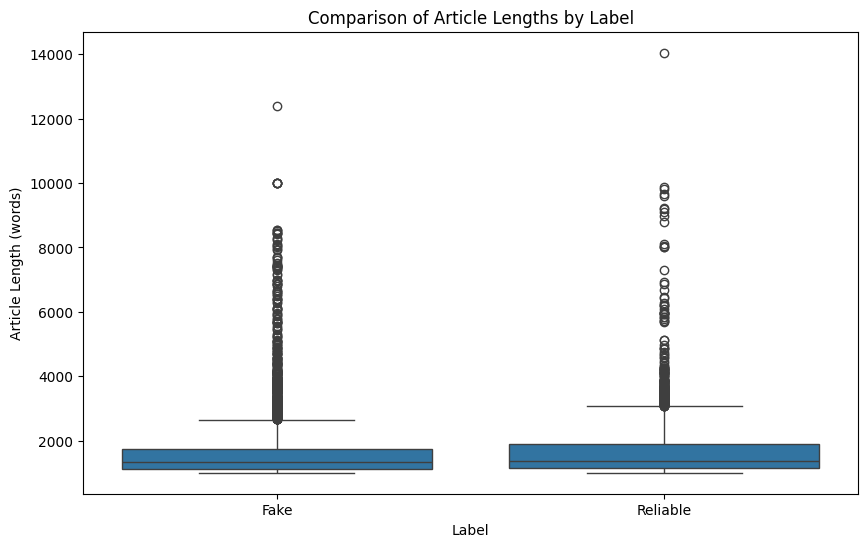

In [8]:
#Boxplot code, not workings as intended but correct plot is in report.
lengths_df = pd.DataFrame({
    'Length': pd.concat([small_fake_articles, small_reliable_articles]),
    'Label': ['Fake'] * len(small_fake_articles) + ['Reliable'] * len(small_reliable_articles)
})
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='Length', data=lengths_df)
plt.title('Comparison of Article Lengths by Label')
plt.xlabel('Label')
plt.ylabel('Article Length (words)')
plt.show()